 # Modeling the swelling behavior of a hypromellulose-based pharmaceutical formulation


In [1]:
import numpy as np
from numpy import array
from diffusionpy import Diffusion_MS,D_Matrix,Diffusion_MS_iter,vpure,dlnai_dlnxi,circular,origin_like
import matplotlib.pyplot as plt

We import the experimental data from https://doi.org/10.1016/s0168-3659(99)00104-2

In [2]:

swelling_data=array([[0.       ,    0.    ],
       [  9.24861,   0.895  ],
       [ 11.18739,   1.08754],
       [ 16.86526,   1.2824 ],
       [ 32.37552,   1.54222],
       [ 63.25758,   2.15696],
       [121.14411,   2.80418],
       [152.02616,   3.06168],
       [182.76973,   3.28902],
       [211.713  ,   3.51403],
       [242.59505,   3.8388 ],
       [271.53832,   4.00119],
       [302.42037,   4.25869],
       [333.30242,   4.38859],
       [360.3069 ,   4.61593],
       [420.13222,   5.06829],
       [451.01427,   5.13324],
       [483.83511,   5.35826]])

minutes_exp=swelling_data[:,0]
thickness_millis=swelling_data[:,1]
msol=500000
mges0=125
ww0=0.01
dl0=0.4
dl8=0.4
wi0=np.asarray([(1-dl0)*(1-ww0),dl0*(1-ww0),ww0])

We wan to model this particular behavior

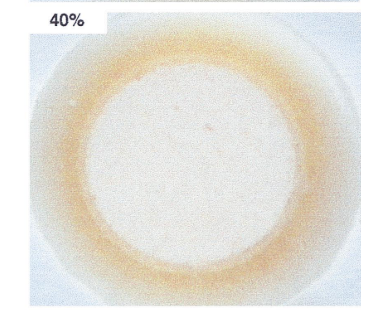

In [3]:
from IPython.display import Image
Image("swelling_hpmc.png")

 We want to describe the water sorption and dissolution of this formulation. The formulation consists of three components: the hypromellulose (hpmc) which is the polymer, the buflomedil pyridoxal phosphate (bpp) as an API and water. First we define starting and equilibrium weight fractions.

In [4]:
nc=3
L=6/1000
ww8=0.95
wi8=np.asarray([(1-dl8)*(1-ww8),dl8*(1-ww8),ww8])
Dvec=np.asarray([8E-12,5E-10,8E-7]) 
Mi=np.asarray([86000,554.5,18.015])
nt=300
t=np.linspace(0,minutes_exp[-1],nt)*60
mobile=np.asarray([False,True,True])

EJ=np.asarray([2E9])
etaJ=np.asarray([1E13])
exponent=np.asarray([0.,2.])

# Density of BPP  1394 kg/m3 at 37 C via Helium Pycnometry https://doi.org/10.1016/s0168-3659(99)00104-2
# Water solubility of BPP  0.65 kg/l  https://doi.org/10.1016/s0168-3659(99)00104-2



In [5]:
T=298.15
p=1E5
kij=D_Matrix(np.asarray([0,-0.156,-0.025]),nc)
par={"mi":np.asarray([4136.278, 14.283,1.20469]),
"si": np.asarray([2.889, 3.535,2.797059952]),
"ui" :np.asarray([298.047, 262.79,353.95]),
"eAi" :np.asarray([0., 886.4,2425.67]),
"kAi":np.asarray([0.02, 0.02,0.04509]),
"NAi":np.asarray([525., 3.,1.]),
"Mi": Mi,
"kij":kij}

vpures=vpure(p,T,**par)
par["vpure"]=vpures
dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi(T,wi,**par)

In [6]:

wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,full_output=True,nz=20,EJ=EJ,etaJ=etaJ,exponent=exponent)
wrel=-mges0/msol*(wt*Lt[:,None]/L-wi0)


------------- Start diffusion modeling ----------------


------------- Diffusion modeling took 0.4644575 seconds ----------------


 We can determine the mass dissolved in the dissolution medium by quantifying the mass that leaves the ASD. The initial mass of the ASD and the mass of the dissolution medium must be known

 We plot the results

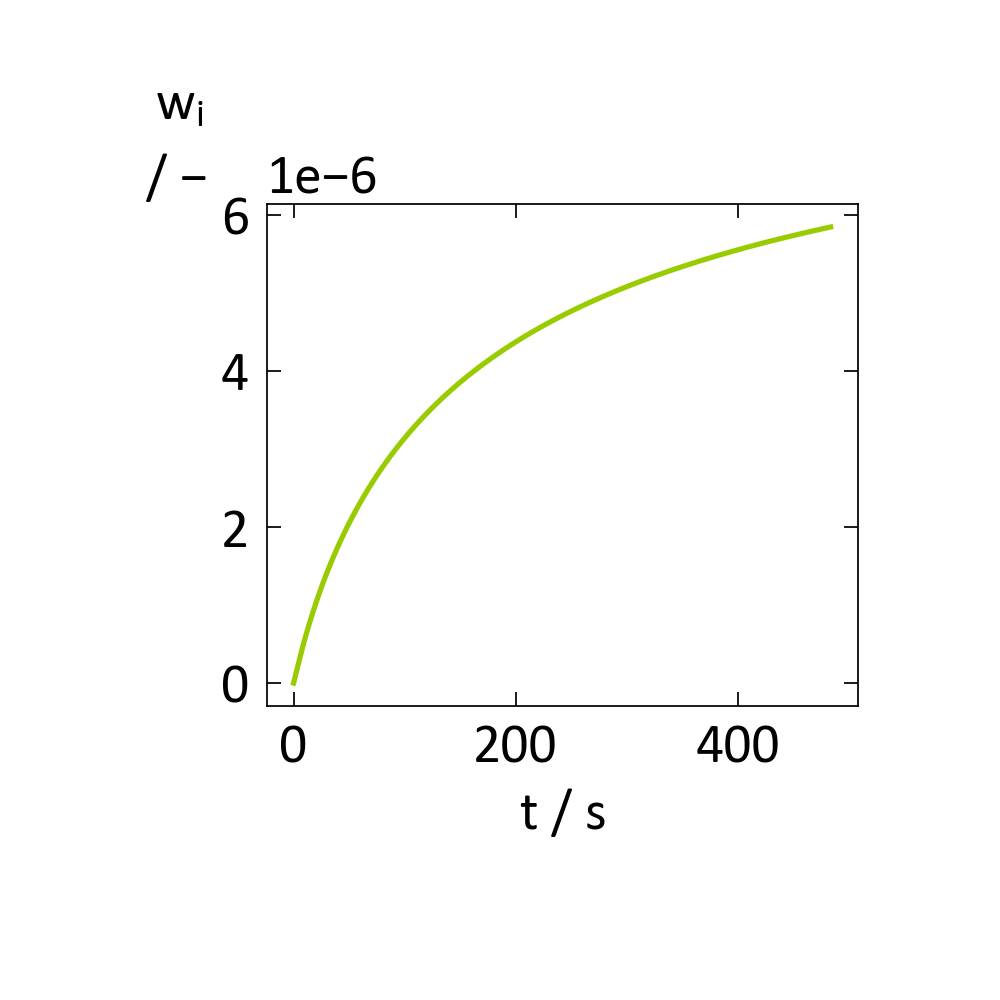

In [10]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

fig, ax = origin_like.subplots()
origin_like.plot(ax,t/60,wrel[:,1], "g-")
origin_like.set_xlabel(ax,"t","s")
origin_like.set_ylabel(ax,"w_i","-")

And lastly

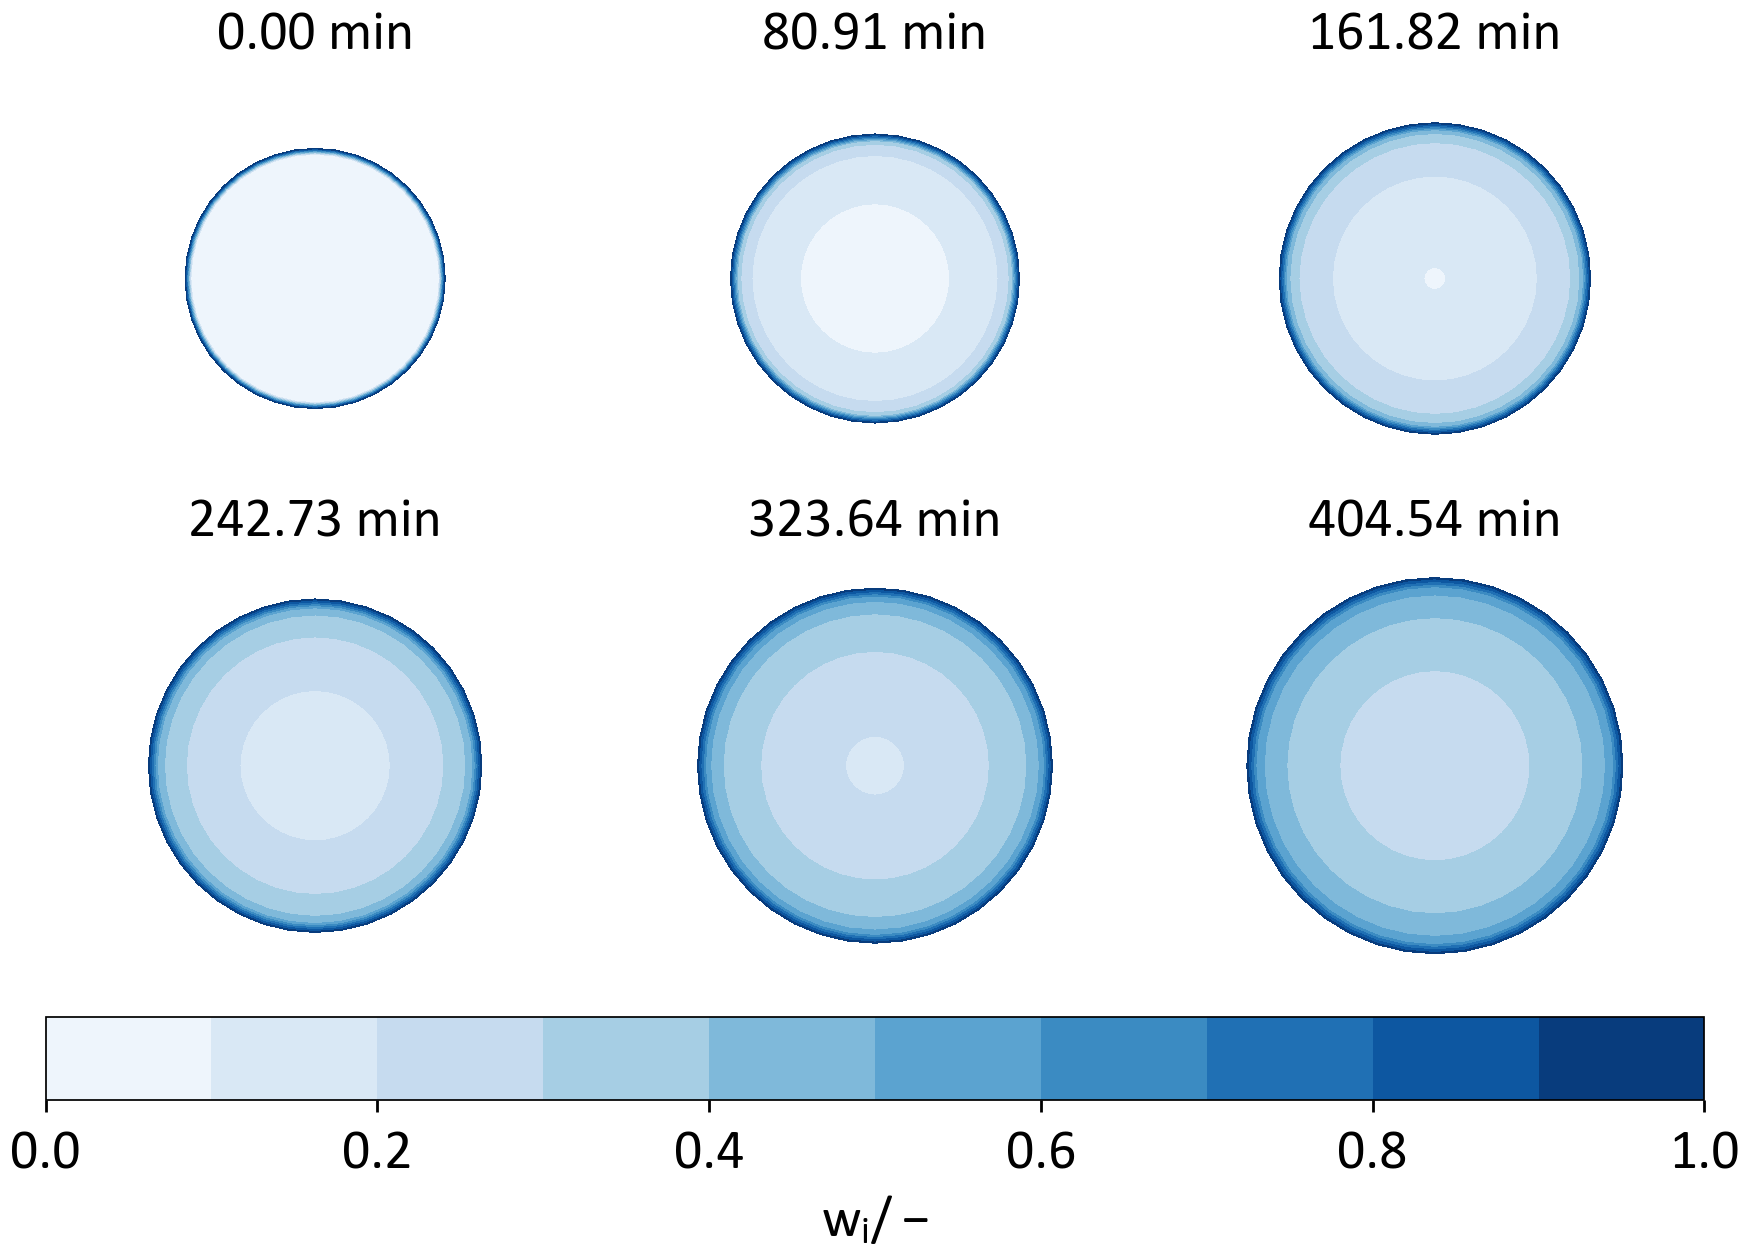

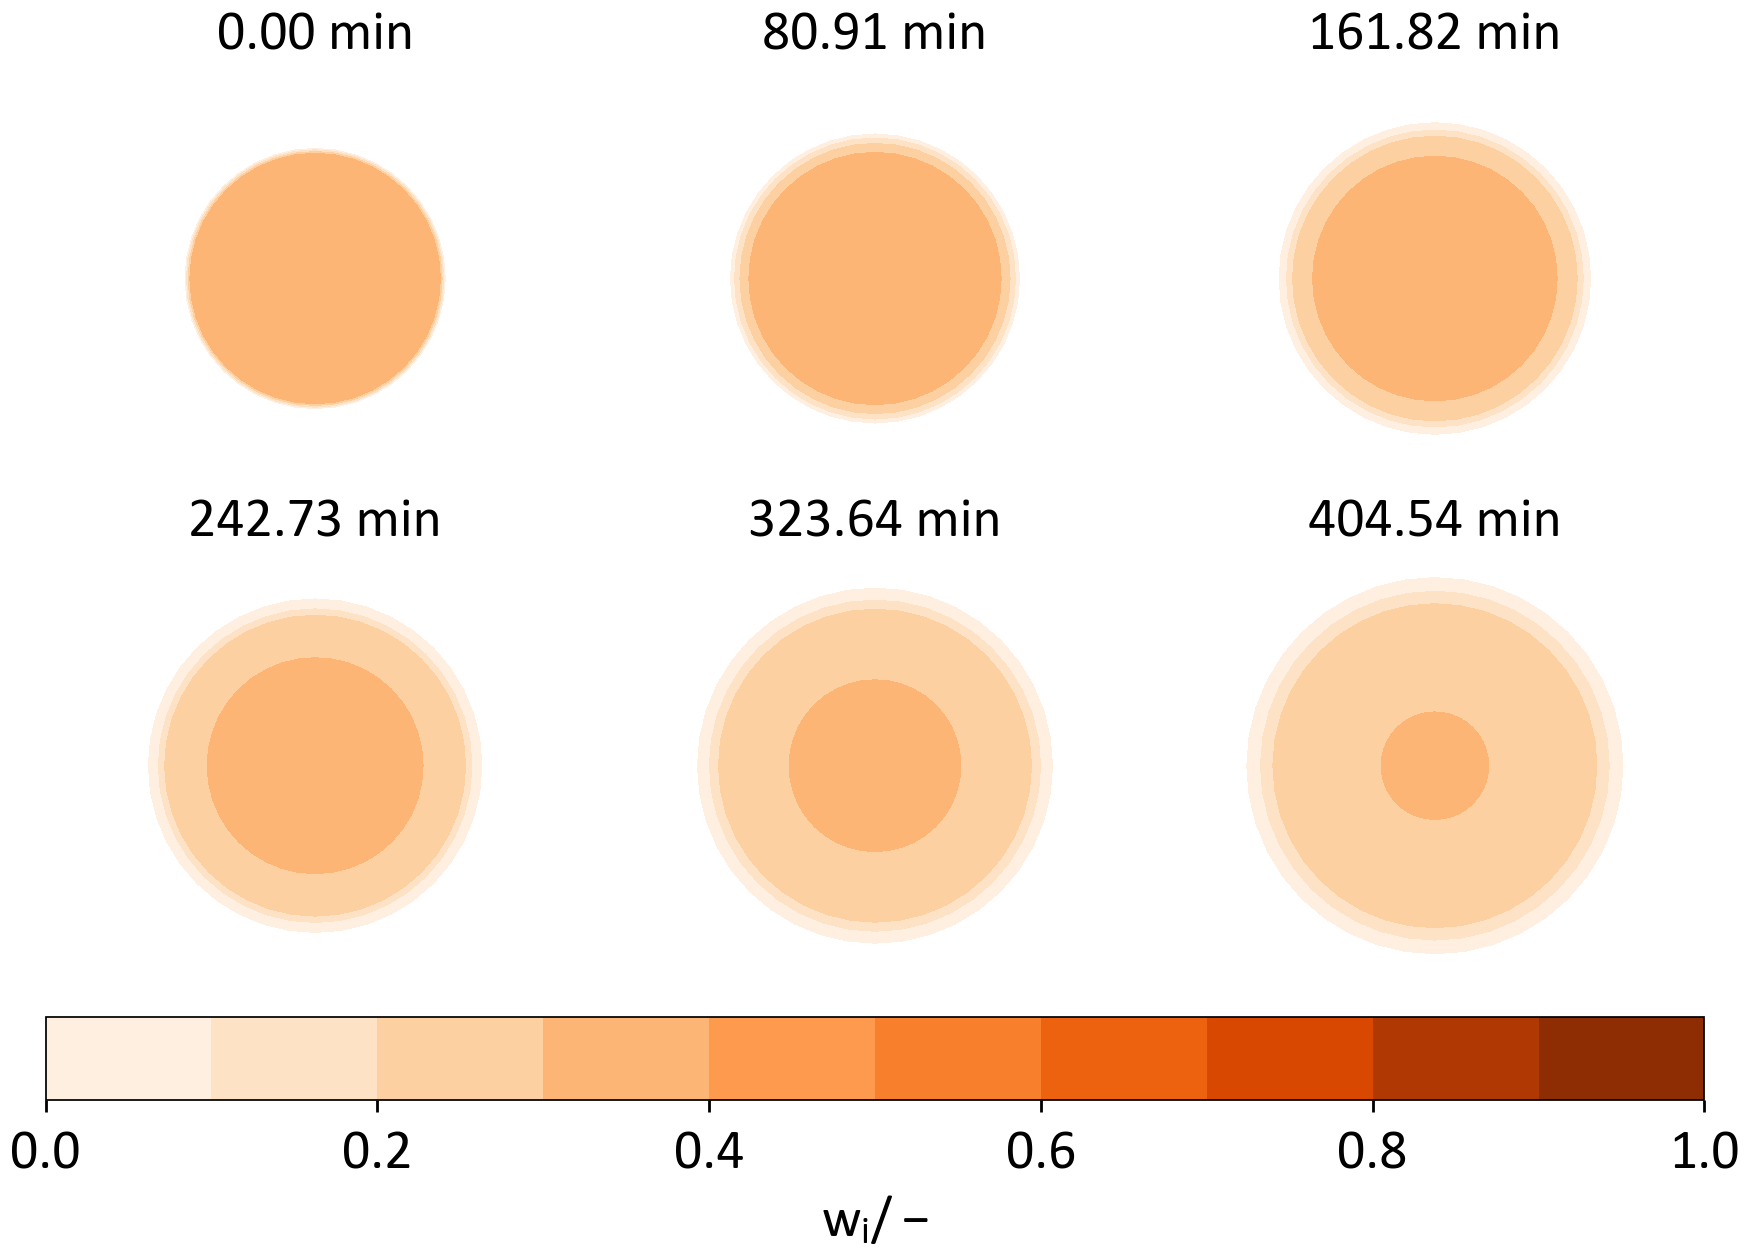

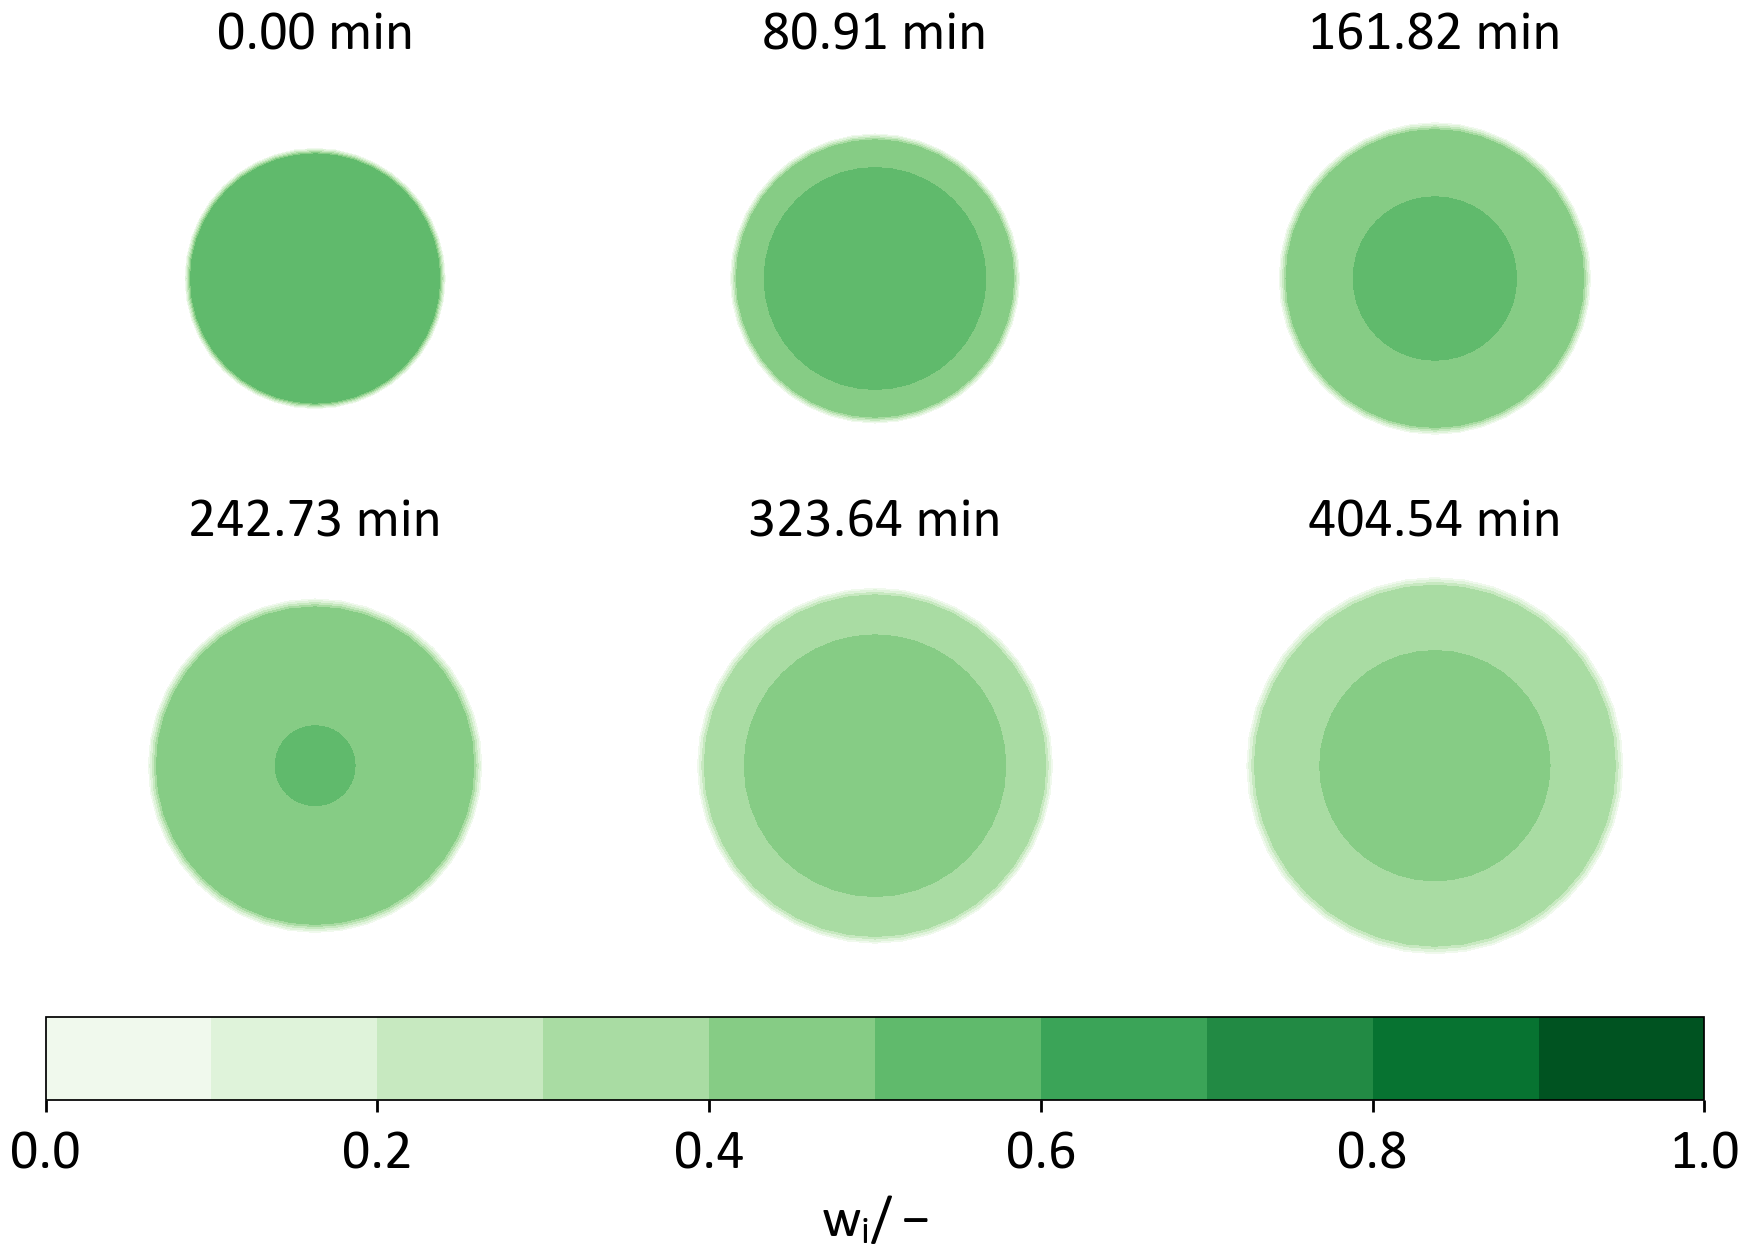

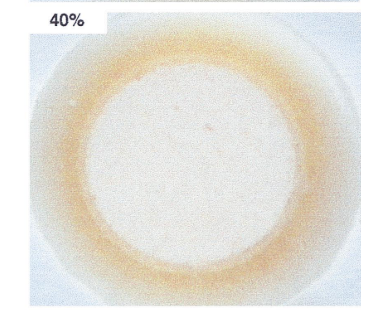

In [11]:

circular(t,zvec,wtz,Lt=Lt,instances=6,comp=2,cmap="Blues")
circular(t,zvec,wtz,Lt=Lt,instances=6,comp=1,cmap="Oranges")
circular(t,zvec,wtz,Lt=Lt,instances=6,comp=0,cmap="Greens")
plt.show()
Image("swelling_hpmc.png")

We check the thickness


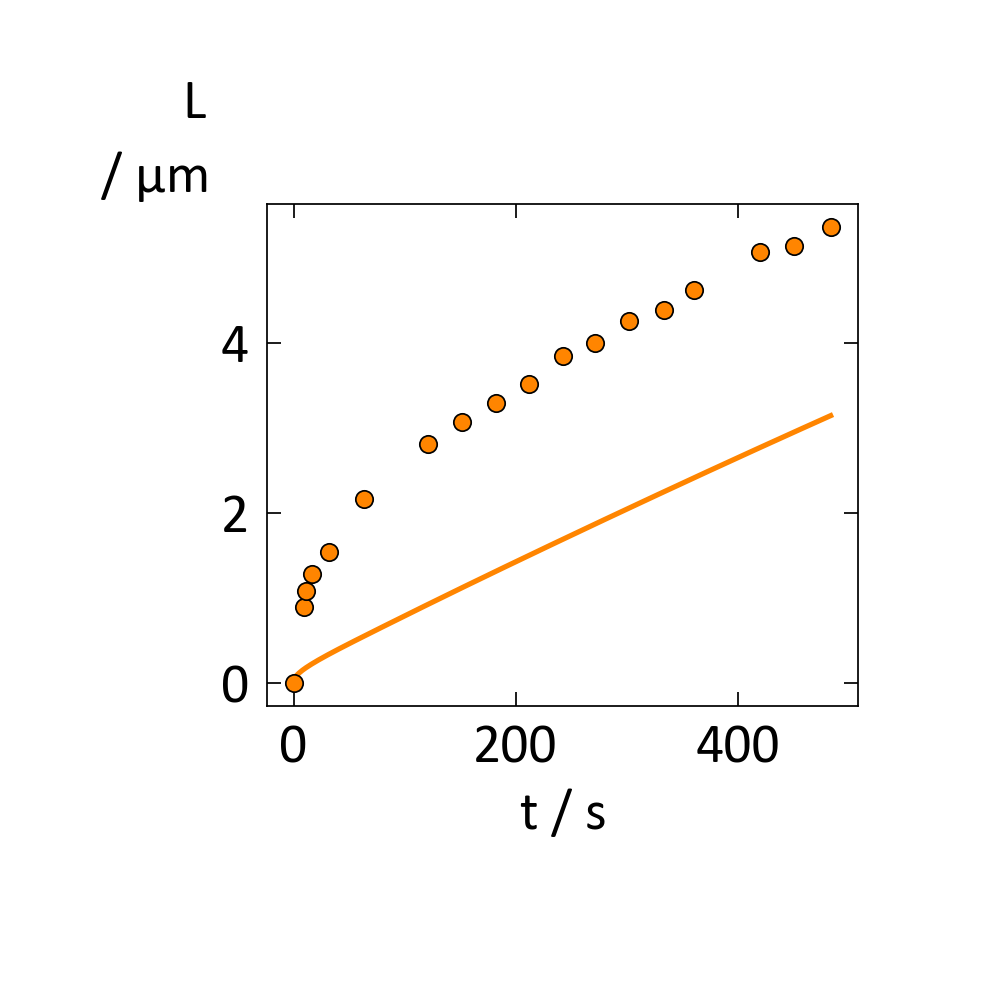

In [14]:
fig, ax = origin_like.subplots()
origin_like.plot(ax,t/60,(Lt-L)*1000, "r-")
origin_like.plot(ax,minutes_exp,thickness_millis, "ro")
origin_like.set_xlabel(ax,"t", "s")
origin_like.set_ylabel(ax,"L", "µm")
plt.show()